In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("mpgdata.csv")
df

,MPG,Cyl,Displacement,Horsepower,Weight,Acceleration,Year,CountryCode,Model
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86,2790,15.6,82,1,"""ford mustang gl"""
402,44.0,4,97.0,52,2130,24.6,82,2,"""vw pickup"""
403,32.0,4,135.0,84,2295,11.6,82,1,"""dodge rampage"""
404,28.0,4,120.0,79,2625,18.6,82,1,"""ford ranger"""


# 説明変数の分布を確認しよう

## 基本統計量の確認

In [47]:
df.describe()

,MPG,Cyl,Displacement,Horsepower,Weight,Acceleration,Year,CountryCode
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182,1.568966
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737,0.797479
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000,1.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## 列ごとの可視化

c:\users\hiroa\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MPG', ylabel='Density'>

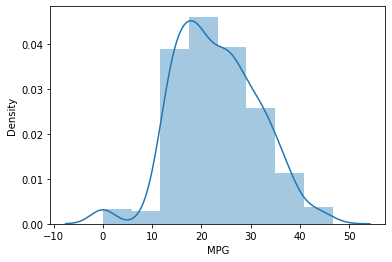

In [48]:
sns.distplot(df['MPG'], kde=True, bins=8)

## ヒストグラム、散布図一括表示

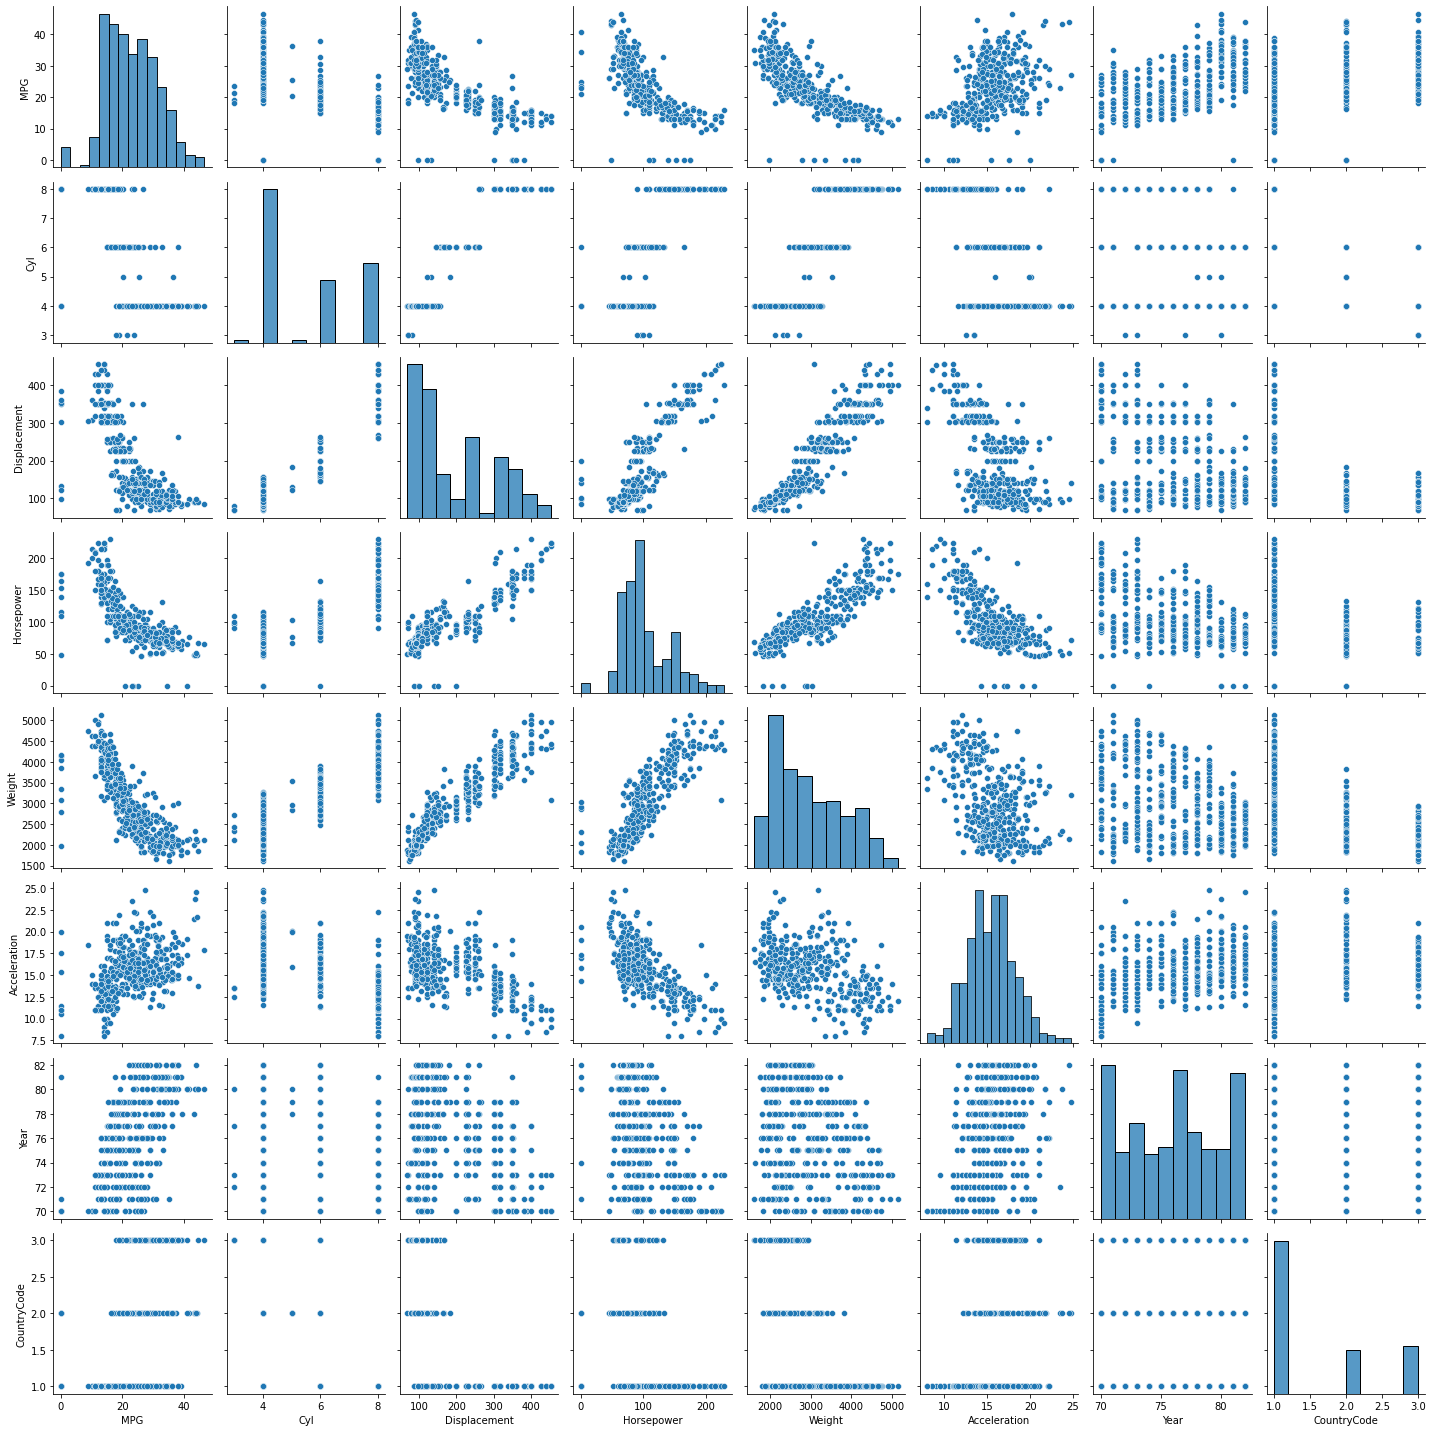

In [49]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

## 箱ひげ図とswarmプロットの表示

<AxesSubplot:>

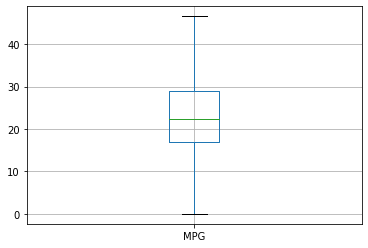

In [50]:
df.boxplot(column="MPG")

<AxesSubplot:ylabel='MPG'>

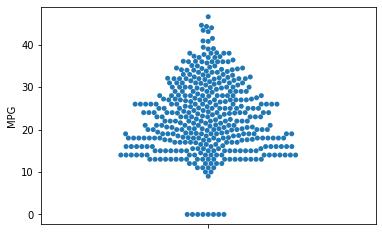

In [51]:
sns.swarmplot(y=df["MPG"])

In [52]:
df.head(20)

,MPG,Cyl,Displacement,Horsepower,Weight,Acceleration,Year,CountryCode,Model
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""
5,15.0,8,429.0,198,4341,10.0,70,1,"""ford galaxie 500"""
6,14.0,8,454.0,220,4354,9.0,70,1,"""chevrolet impala"""
7,14.0,8,440.0,215,4312,8.5,70,1,"""plymouth fury iii"""
8,14.0,8,455.0,225,4425,10.0,70,1,"""pontiac catali0"""
9,15.0,8,390.0,190,3850,8.5,70,1,"""amc ambassador dpl"""


## 外れ値の削除

In [53]:
# MPGの外れ値「0」の行を削除
df = df[df["MPG"] != 0]
df.head(20)

# Cylのデータ数確認
count = df['Cyl'] == 3
print(count.sum())
count = df['Cyl'] == 5
print(count.sum())

# Cylから3と5を削除
df = df[df["Cyl"] != 3]
df = df[df["Cyl"] != 5]

4
3


In [54]:
# ラベルエンコーディング
le = LabelEncoder() #LabelEncoderのインスタンスを生成
le = le.fit(df['Model']) #ラベルエンコーディング処理
df['Model'] = le.transform(df['Model']) #ラベルエンコーディングをdfに適用
df

,MPG,Cyl,Displacement,Horsepower,Weight,Acceleration,Year,CountryCode,Model
0,18.0,8,307.0,130,3504,12.0,70,1,48
1,15.0,8,350.0,165,3693,11.5,70,1,33
2,18.0,8,318.0,150,3436,11.0,70,1,227
3,16.0,8,304.0,150,3433,12.0,70,1,14
4,17.0,8,302.0,140,3449,10.5,70,1,160
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86,2790,15.6,82,1,150
402,44.0,4,97.0,52,2130,24.6,82,2,294
403,32.0,4,135.0,84,2295,11.6,82,1,117
404,28.0,4,120.0,79,2625,18.6,82,1,157


# 機械学習を実行しよう

決定係数_train：0.5889418316293293
決定係数_test：0.7266864210791919
RMSE_train:4.9893153866864335
RMSE_test:4.160882484877098


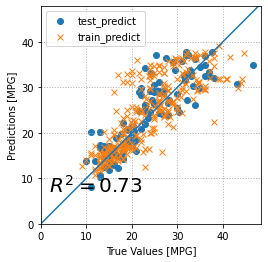

In [55]:
# SVR
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 入力データと正解ラベルに分割
data = np.array(df)    # Numpy配列に変換
X = data[:,1:]
y = data[:,0]

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# サポートベクターマシンによる学習
model = svm.SVR(C=1.0, kernel='linear', epsilon=0.1)    # 正則化パラメータ=1, 線形カーネルを使用
model.fit(X_train, y_train)                             # フィッティング

# 決定係数
r2_train = model.score(X_train, y_train)  
r2_test = model.score(X_test, y_test)
print("決定係数_train：" + str(r2_train))
print("決定係数_test：" + str(r2_test))

# 学習済みモデルを利用した予測値
y_pre_train = model.predict(X_train)    # 学習データでの予測
y_pre_test = model.predict(X_test)      # テストデータでの予測

# RMSEの計算
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pre_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pre_test))

print("RMSE_train:" + str(RMSE_train))
print("RMSE_test:" + str(RMSE_test))

# グラフ描画
plt.grid(linestyle='dotted', linewidth=1)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.scatter(y_test, y_pre_test, label='test_predict', lw=1, marker="o")
plt.scatter(y_train, y_pre_train, label='train_predict', lw=1, marker="x")
plt.legend()
plt.text(0.5, 7, '$\ R^{2}=$' + str(round(r2_test, 2)), fontsize=20)
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()